##### 3.3 $(a)$
利用函数变换法
$$
\int_0^{x(r)} \frac{2x}{x_{\max}^2} \mathrm{d} x = r \implies x = x_{\max} \sqrt{r},
$$
故当$r$满足$0-1$之间的均匀分布时，$x(r)$的分布服从$f(x)$。取$x_{\max} = 1$，产生分布如下

In [1]:
import ROOT
import math

num_events = 100000

hist = ROOT.TH1D("f(x)", "f(x) Distribution from Uniform via Function Transform", 150, -1.5, 1.5)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    u1 = rnd.Rndm()
    
    z0 = math.sqrt(u1)
    
    hist.Fill(z0)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Value")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("f(x) Distribution from Uniform")

canvas.Update()

ModuleNotFoundError: No module named 'ROOT'

##### $(b)$
舍选法代码如下：

In [32]:
import ROOT


num_events = 100000

hist = ROOT.TH1D("f(x)", "f(x) Distribution from Uniform via acceptance-rejection method", 150, -1.5, 1.5)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    u1 = rnd.Rndm()
    u2 = 2 * rnd.Rndm()

    if u2 <= 2 * u1:
        z0 = u1
        hist.Fill(z0)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Value")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("f(x) Distribution")

canvas.Update()


Warning in <TROOT::Append>: Replacing existing TH1: f(x) (Potential memory leak).


##### 3.5
考虑题中所述$\tau = 1, \mu = 0, \sigma = 0.5$的情形，程序如下

In [16]:
import ROOT

num_events = 100000

hist = ROOT.TH1D("Decay time", "Measurement of decay times", 140, -4, 10)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    t = rnd.Exp(1)
    x = rnd.Gaus(0, 0.5)

    y = t + x

    if y > 0:
        hist.Fill(y)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("measured value y")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("Decay time")

canvas.Update()

考虑$\tau \ll \sigma$情形，取$\tau = 0.01, \sigma = 1$，相应程序如下

In [ ]:
import ROOT

num_events = 100000

hist1 = ROOT.TH1D("Decay time", "Measurement of decay times", 80, -1, 3)
hist2 = ROOT.TH1D("hist2", "Real Value of decay times", 60, 0, 3)
hist2.FillRandom("landau", 10000)
hist2.SetLineColor(ROOT.kRed)
hist2.Draw("same")

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    t = rnd.Exp(0.01)
    x = rnd.Gaus(0, 1)

    y = t + x

    if y > 0:
        hist1.Fill(y)
        hist2.Fill(t)

canvas = ROOT.TCanvas()

hist1.Draw()
hist2.Draw("same")

hist.SetLineColor(ROOT.kBlue)
hist2.SetLineColor(ROOT.kRed)
hist1.SetLineWidth(2)
hist2.SetLineWidth(2)
hist1.GetXaxis().SetTitle("time")
hist1.GetYaxis().SetTitle("Counts")

hist1.SetTitle("Decay time")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist1, "measured", "l")
legend.AddEntry(hist2, "real", "l")
legend.Draw()

canvas.Update()

Warning in <TROOT::Append>: Replacing existing TH1: Decay time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


对于$\tau \gg \sigma$的情形，取$\tau = 1, \sigma = 0.01$，相应程序如下

In [28]:
import ROOT

num_events = 100000

hist1 = ROOT.TH1D("Decay time", "Measurement of decay times", 80, -1, 3)
hist2 = ROOT.TH1D("hist2", "Real Value of decay times", 60, 0, 3)
hist2.FillRandom("landau", 10000)
hist2.SetLineColor(ROOT.kRed)
hist2.Draw("same")

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    t = rnd.Exp(1)
    x = rnd.Gaus(0, 0.01)

    y = t + x

    if y > 0:
        hist1.Fill(y)
        hist2.Fill(t)

canvas = ROOT.TCanvas()

hist1.Draw()
hist2.Draw("same")

hist.SetLineColor(ROOT.kBlue)
hist2.SetLineColor(ROOT.kRed)
hist1.SetLineWidth(2)
hist2.SetLineWidth(2)
hist1.GetXaxis().SetTitle("time")
hist1.GetYaxis().SetTitle("Counts")

hist1.SetTitle("Decay time")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist1, "measured", "l")
legend.AddEntry(hist2, "real", "l")
legend.Draw()

canvas.Update()

Warning in <TROOT::Append>: Replacing existing TH1: Decay time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


##### 3.6 $(a)$
利用函数变换法，设$r$服从$0-1$的均匀分布，则二者累积分布函数应相等
$$
\int_{-\infty}^{x(r)} \frac{1}{\pi} \frac{1}{1 + x^2} \mathrm{d} x = \int_0^r g(r) \mathrm{d} r = r \implies x(r) = \tan \left[ \pi \left( r - \frac{1}{2} \right)\right].
$$
得证。

##### $(b)$
程序如下


In [35]:
import ROOT
import math

num_events = 10000

hist = ROOT.TH1D('', 'Cauchy Distribution from Uniform via Function Transform', 200, -10, 10)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    u1 = rnd.Rndm()

    z0 = math.tan(math.pi * (u1 - 0.5))
    
    hist.Fill(z0)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Value")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("Cauchy Distribution")

canvas.Update()


##### $(c)$
取$n = 10$，修改后代码如下

In [38]:
import ROOT
import math

num_events = 10000
n = 10

hist = ROOT.TH1D('', 'Cauchy Distribution from Uniform via Function Transform', 200, -3, 3)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    sum_x = 0
    for j in range(n):
        u = rnd.Rndm()
        
        x0 = math.tan(math.pi * (u1 - 0.5))
        sum_x += x0
    
    avg_x = sum_x / n
    hist.Fill(avg_x)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Value")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("Cauchy Distribution")

canvas.Update()


In [ ]:
import ROOT
import math

num_events = 1000

hist = ROOT.TH1D('', 'Cauchy Distribution from Uniform via Function Transform', 200, -10, 10)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for i in range(num_events):
    u1 = rnd.Rndm()

    z0 = math.tan(math.pi * (u1 - 0.5))
    
    hist.Fill(z0)

canvas = ROOT.TCanvas()

hist.Draw()

hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Value")
hist.GetYaxis().SetTitle("Counts")

hist.SetTitle("Cauchy Distribution")

canvas.Update()

##### 3.8
在平面直角坐标系中，单位圆内的均匀分布为
$$
f(x, y) \mathrm{d} x\mathrm{d} y = \frac{1}{\pi} \mathrm{d} x\mathrm{d} y.
$$
作坐标变换，在平面极坐标系中
$$
f(r, \theta) \mathrm{d} r\mathrm{d} \theta = f(x, y) \mathrm{d} x\mathrm{d} y \implies f(r, \theta) = \frac{r}{\pi}.
$$
故应当使用关于$r^2$和$\theta$的均匀分布绘图，程序如下

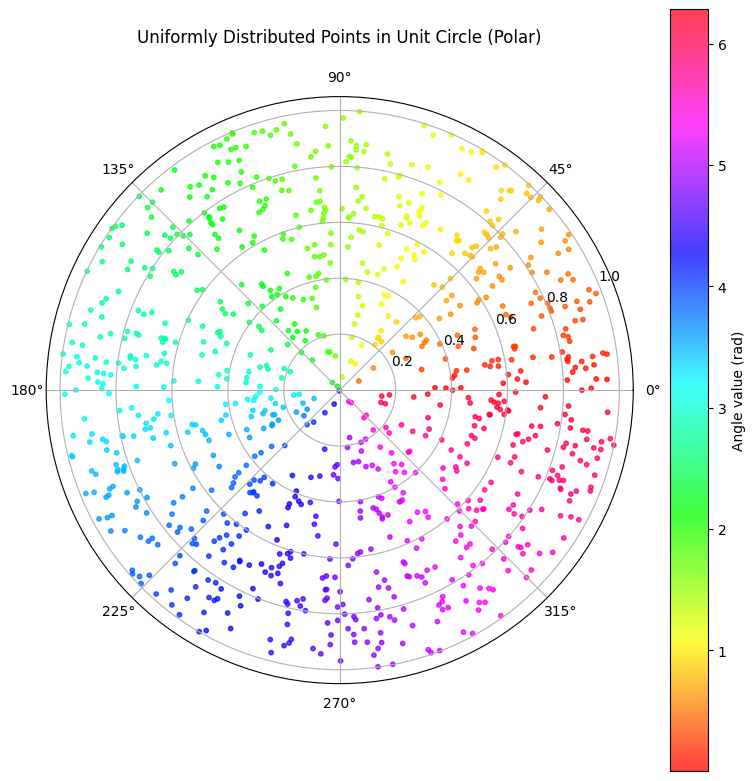

In [6]:
import ROOT
import math
import matplotlib.pyplot as plt

rnd = ROOT.TRandom3()

def generate_uniform_points_in_circle(num_points):
    r_list = []
    theta_list = []
    
    for _ in range(num_points):
        theta = 2 * math.pi * rnd.Rndm()
        
        r = math.sqrt(rnd.Rndm())
        
        theta_list.append(theta)
        r_list.append(r)
    
    return (r_list, theta_list)

r, theta = generate_uniform_points_in_circle(1000)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

scatter = ax.scatter(theta, r, c=theta, s=10, alpha=0.75, cmap='hsv')

plt.colorbar(scatter, label='Angle value (rad)')

ax.set_title("Uniformly Distributed Points in Unit Circle (Polar)", pad=20)
ax.grid(True)

plt.tight_layout()
plt.savefig('polar_scatter_matplotlib.png')
plt.show()

##### 3.9
我们可以利用舍选法来计算积分。由于原被积函数存在奇点，可以使用变量代换来避免被积函数发散。
作$y = \sqrt{x}$的变量代换，原积分可化为
$$
\int_0^1 \frac{e^{-x}}{\sqrt{x}} \mathrm{d} x = \int_{0}^{1} 2e^{-y^2} \mathrm{d} y.
$$
应用舍选法，计算程序如下

In [10]:
import ROOT
import math


rnd = ROOT.TRandom3()

num_events = 100000
num_under_f = 0

for i in range(num_events):
    u1 = rnd.Rndm()
    u2 = 2 * rnd.Rndm()

    f = 2 * math.exp(- u1 ** 2)

    if u2 <= f:
        num_under_f += 1

print(2 * num_under_f / num_events)

1.49328


精确计算得到该积分值为$\sqrt{\pi} \mathrm{erf} (1) \approx 1.49365$，可见利用Monte Carlo方法得到的积分值在$10^5$样本情形下能够精确到小数点后第三位。